# <span style="color:#54B1FF">Exploring Data:</span> &nbsp; <span style="color:#1B3EA9"><b>Analysis</b></span>

<br>

In the previous notebooks in this lesson, data were parsed from a series of HTML files, and the results were saved in a CSV file called **parsed_data.csv**. This file has been copied in the same directory in which this notebook is saved.

In this notebook, we will run some preliminary analyses using some of the techniques we considered in previous lessons.

Let's first import the packages we'll need for this notebook, then let's read the parsed data.

<br>

In [1]:
import os
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
dir0     = os.path.abspath('')              # directory in which this notebook is saved
fnameCSV = os.path.join( dir0, 'parsed_data.csv' )
df       = pd.read_csv(fnameCSV)
title    = df['Title']
pages    = df['Pages']
price    = df['Price']

<br>

Let's next visualize the distribution of book prices.

<br>

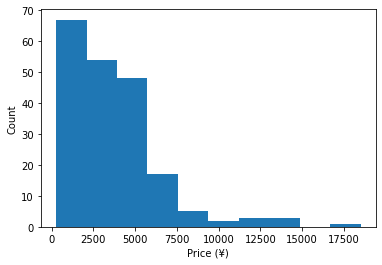

In [3]:
plt.figure()
plt.hist( price )
plt.xlabel( 'Price (¥)' )
plt.ylabel( 'Count' )
plt.show()

<br>

It looks like most book prices are less than ¥2500, and that the average price is less than ¥5000, but let's summarize this distribution more objectively, using the **central tendency**, **dispersion** and **non normality** metrics we considered in Lesson 04.

<br>

___

## Central tendency

In [4]:
x0     = np.mean( price )
x1     = np.median( price )
x2     = stats.mode( price ).mode

print("Mean        = ", x0)
print("Median      = ", x1)
print("Mode        = ", x2)

Mean        =  3687.17
Median      =  2667.0
Mode        =  [5374]


<br>

These results indicate relatively large differences amongst the mean, median and mode. This is usually a good sign that the data are non-normally distributed, and thus that the median (and possibly mode) are better indicators of central tendency than the mean.

To check, let's look at the mode result a little more carefully.

<br>

In [5]:
print( stats.mode( price ) )

ModeResult(mode=array([5374]), count=array([9]))


<br>

This result implies that, while the most common price is ¥5374, only 9 of the 200 books have this price. This means that the mode is probably not very representative of the distributions. Had 100 books, or even 50 books had this price, the mode would be more representative of the distribution, but in this case it would also become closer to the median and mean. For this dataset, the median is therefore probably the best indicator of central tendency.

<br>

___

## Dispersion



In [6]:
x  = price

y0 = np.min( x )  # minimum
y1 = np.max( x )  # maximum
y2 = y1 - y0      # range
y3 = np.percentile( x, 25 ) # 25th percentile (i.e., lower quartile)
y4 = np.percentile( x, 75 ) # 75th percentile (i.e., upper quartile)
y5 = y4 - y3 # inter-quartile range
y6 = np.var( x ) # variance
y7 = np.std( x ) # standard deviation


print("Minimum              = ", y0)
print("Maximum              = ", y1)
print("Range                = ", y2)
print("25th percentile      = ", y3)
print("75th percentile      = ", y4)
print("Inter-quartile range = ", y5)
print("Variance             = ", y6)
print("Standard deviation   = ", y7)

Minimum              =  269
Maximum              =  18498
Range                =  18229
25th percentile      =  1797.5
75th percentile      =  5094.0
Inter-quartile range =  3296.5
Variance             =  8080831.351100006
Standard deviation   =  2842.6803110972583


<br>

From these results we can see that there is a very large range in book prices (of more than ¥18,000), but that that 50% of the books lie within a range of about ¥3300 (i.e., between the lower and upper quartiles). Additionally, the standard deviation is relatively large, implying relative broad dispersion of prices.

<br>

___

## Nonnormality

In [7]:
z0 = stats.skew(x)
z1 = stats.kurtosis(x)

print( f"Skewness     = {z0}")
print( f"Kurtosis     = {z1}")

Skewness     = 1.9431730084032617
Kurtosis     = 5.371752531923347


<br>

Recall that, when the distribution is normal, skewness and kurtosis values are expected to approach zero. Since both values are considerably greater than zero, they imply that the data is not normally distributed. This gives use further evidence that the median is a better indicator of central tendency than the mean. This also gives us evidence that dispersion measures like the IQR (inter-quartile range) are better than variance and standard deviation, which are characteristics of normal distributions.

Now that we have summarized the basic distribution characteristics, let's check whether our main outcome variable (price) is correlated with the books' page counts.

<br>

___

## Correlation

Correlation coefficient: 0.366


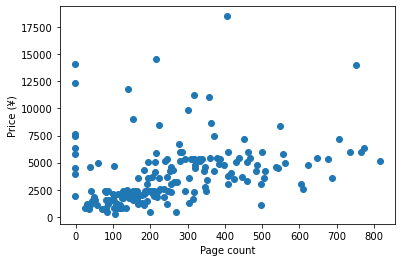

In [8]:
x   = pages
y   = price
r   = np.corrcoef(x, y)[0,1]
print( 'Correlation coefficient: %0.3f' %r )

plt.figure()
plt.scatter(x, y)
plt.xlabel('Page count')
plt.ylabel('Price (¥)')
plt.show()

<br>

This correlation value is relatively weak.  However, recall that we assigned `pages` values of -1 to book entries that were missing page counts. Let's therefore exclude these books from our analysis.

<br>

Correlation coefficient: 0.509


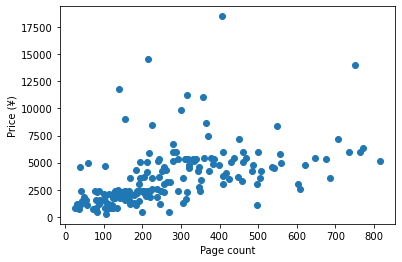

In [9]:
i   = pages > 0
x   = pages[i]
y   = price[i]
r   = np.corrcoef(x, y)[0,1]
print( 'Correlation coefficient: %0.3f' %r )

plt.figure()
plt.scatter(x, y)
plt.xlabel('Page count')
plt.ylabel('Price (¥)')
plt.show()

<br>

We can see that, by excluding the books without page count values, we have increased the correlation coefficient substantially. The correlation strength is still relatively weak, but we have removed an important dataset peculiarity that gave an incorrect impression of the true correlation strength.

Let's last add a regression line to this correlation analysis.

<br>

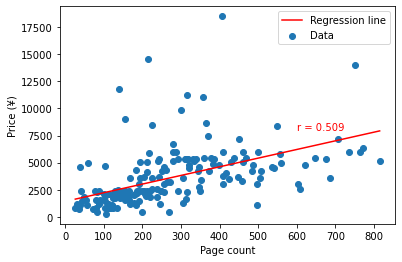

In [10]:
# Calculate regression line:
a,b    = np.polyfit(x, y, deg=1)
x0,x1  = min(x), max(x)
y0,y1  = a*x0 + b, a*x1 + b


plt.figure()
plt.scatter(x, y, label='Data')
plt.text(600, 8000, 'r = %.3f' %r, color='r')
plt.plot([x0,x1], [y0,y1], color='r', label='Regression line')
plt.legend()
plt.xlabel('Page count')
plt.ylabel('Price (¥)')
plt.show()

<br>

This completes our preliminary analysis of this dataset. In the next notebook we'll summarize this entire lesson using two scripts: **parse** and **analyze**.

In subsequent lessons we'll study more advanced analysis techniques that should generally be applied after the preliminary analysis techniques that we've considered up until this point.